# 2025-2 계절학기 보건빅데이터통계분석 중간고사

- 시간: 60분
- 총점: 100점(기초 40점 + 응용 40점 + 도전20점)
- 모든 문제는 Python 코드 작성 필수
- 데이터: cafe_sales_2024.csv(카페 음료 판매 데이터)
- 출력 결과가 다소 달라도 풀이 논리 + 코드 작성 여부를 기준으로 부분점수 부여
- **코드와 출력 결과를 함께 제출**
- 필수 라이브러리는 스스로 설치 및 부착
- 인터넷 검색 금지, 생성형 AI사용 금지
---



## 데이터 설명
| column         | 설명                 |
| -------------- | ------------------ |
| date           | 구매일자 (YYYY-MM-DD)  |
| item           | 품목명                |
| category       | Beverage / Dessert |
| price          | 단가                 |
| qty            | 수량                 |
| rating         | 고객평점 (0~5)         |
| payment_method | 결제수단               |
| takeout        | Yes / No           |


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

c:\anaconda\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
sns.set_theme(style="darkgrid")
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False # minus 인식

## Part 1. 기초(40점)

### 1. 데이터 불러오기 및 확인
- csv파일을 불러와 df라는 변수에 저장하고,
- 1-1. 상위 10행 출력
- 1-2. 전체 행/열 개수 출력
- 1-3. 데이터 전체 정보 확인
- 1-4. 출력 결과를 보고, 범주형 변수는 무엇이며, 수치형 변수는 무엇인지 작성하시오.[서술형]

In [3]:
cs_df = pd.read_csv("./cafe_sales_2024.csv", encoding = 'cp949')
cs_df.head(10)

,癤풼ate,item,category,price,qty,rating,payment_method,takeout
0,2024-01-01,Americano,Beverage,4500,1,4.6,Mobile App,No
1,2024-01-01,Cafe Latte,Beverage,5000,1,4.0,Credit Card,Yes
2,2024-01-01,Cafe Latte,Beverage,5000,2,4.6,Cash,Yes
3,2024-01-01,Vanilla Latte,Beverage,5500,2,4.7,Mobile App,Yes
4,2024-01-01,Croffle,Dessert,4000,4,4.4,Credit Card,Yes
5,2024-01-01,Tiramisu,Dessert,6500,1,3.8,Credit Card,No
6,2024-01-01,Vanilla Latte,Beverage,5500,3,3.8,Mobile App,Yes
7,2024-01-01,Macaron,Dessert,3000,1,4.7,Credit Card,No
8,2024-01-01,Vanilla Latte,Beverage,5500,1,4.7,Credit Card,No
9,2024-01-01,Cafe Latte,Beverage,5000,1,4.8,Credit Card,No


In [4]:
cs_df.columns.value_counts()

癤풼ate             1
item              1
category          1
price             1
qty               1
rating            1
payment_method    1
takeout           1
Name: count, dtype: int64

In [5]:
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18869 entries, 0 to 18868
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   癤풼ate           18869 non-null  object 
 1   item            18869 non-null  object 
 2   category        18869 non-null  object 
 3   price           18869 non-null  int64  
 4   qty             18869 non-null  int64  
 5   rating          18869 non-null  float64
 6   payment_method  18869 non-null  object 
 7   takeout         18869 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.2+ MB


범주형 : item, category, qty, payment_method, takeout
수치형 : date, price, rating, 

### 2. 기초 통계 분석
- 2-1. qty 평균 출력
- 2-2. category별 판매 건수(판매 횟수) 출력
- 2-3. qty 기준으로 내림차순 정렬하여 상위 5개 행을 출력

In [6]:
cs_df['qty'].mean()

1.4718321055699826

In [7]:
cs_df['category'].value_counts()

category
Beverage    13374
Dessert      5495
Name: count, dtype: int64

In [ ]:
cs_df.groupby('qty').head(5)

SyntaxError: positional argument follows keyword argument (1011193892.py, line 1)

### 3. 파생변수(매출액) 생성
- price(단가)와 qty(수량)를 곱하여 주문 건당 총 매출액을 의미하는 total_sales 컬럼을 새로 생성하시오.

- 제대로 생성되었는지 상위 5개 행을 출력하시오.

In [9]:
cs_df['total_sales'] = cs_df['price'] * cs_df['qty']

In [10]:
cs_df.head()

,癤풼ate,item,category,price,qty,rating,payment_method,takeout,total_sales
0,2024-01-01,Americano,Beverage,4500,1,4.6,Mobile App,No,4500
1,2024-01-01,Cafe Latte,Beverage,5000,1,4.0,Credit Card,Yes,5000
2,2024-01-01,Cafe Latte,Beverage,5000,2,4.6,Cash,Yes,10000
3,2024-01-01,Vanilla Latte,Beverage,5500,2,4.7,Mobile App,Yes,11000
4,2024-01-01,Croffle,Dessert,4000,4,4.4,Credit Card,Yes,16000


### 4. 조건부 필터링 및 포맷팅
- 4-1. rating(평점)이 4.8 이상인 데이터만 필터링하여 high_rating 변수에 저장하시오.
- 4-2. high_rating 데이터 중 첫 번째 행만 추출하여 target변수에 넣으시오.
- 4-3. 첫번째 행의 item과 total_sales를 가져와 f-string을 사용하여 아래 형식으로 출력하시오.
  * 출력 예시: 최우수 메뉴: [Americano], 매출액: [13,500]원 (천 단위 콤마 포함 필수)


In [11]:
high_rating = cs_df['rating'] >= 4.8

In [27]:
target = cs_df[high_rating].head(1)
target_row = target.iloc[0]

In [28]:
print(f"최우수 메뉴: [{target_row['item']}], 매출액: [{target_row['total_sales']:,}]원")

최우수 메뉴: [Cafe Latte], 매출액: [5,000]원


## Part 2. 응용(40점)

### 1. 기술통계량 및 그룹별 집계
- 1-1. 'price', 'qty', 'rating' 컬럼의 기술통계량을 출력하시오.
- 1-2. 카테고리(category)가 'Beverage' 이면서, 결제 수단(payment_method)이 'Credit Card' 인 데이터만 필터링하시오.
- 1-3. 위 조건에 해당하는 데이터에서 상품(item)별 평균 평점(rating)을 구하시오.

In [ ]:
feature = ['price', 'qty', 'rating']
cs_df[feature].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
price,18869.0,4946.39,932.00,3000.0,4500.0,5000.0,5500.0,6500.0
qty,18869.0,1.47,0.88,1.0,1.0,1.0,2.0,5.0
rating,18869.0,4.14,0.65,1.0,3.8,4.2,4.6,5.0


In [ ]:
filter = (cs_df.category == 'Beverage') & (cs_df.payment_method == 'Credit Card')
target2 = cs_df[filter]
target2


,癤풼ate,item,category,price,qty,rating,payment_method,takeout,total_sales,rating_group
1,2024-01-01,Cafe Latte,Beverage,5000,1,4.0,Credit Card,Yes,5000,높음
8,2024-01-01,Vanilla Latte,Beverage,5500,1,4.7,Credit Card,No,5500,높음
9,2024-01-01,Cafe Latte,Beverage,5000,1,4.8,Credit Card,No,5000,높음
13,2024-01-01,Americano,Beverage,4500,1,4.3,Credit Card,No,4500,높음
15,2024-01-01,Cafe Latte,Beverage,5000,1,4.7,Credit Card,Yes,5000,높음
...,...,...,...,...,...,...,...,...,...,...
18859,2024-12-31,Cafe Latte,Beverage,5000,4,3.8,Credit Card,Yes,20000,보통
18861,2024-12-31,Vanilla Latte,Beverage,5500,1,4.6,Credit Card,Yes,5500,높음
18864,2024-12-31,Cafe Latte,Beverage,5000,1,4.4,Credit Card,No,5000,높음
18866,2024-12-31,Cafe Latte,Beverage,5000,1,4.3,Credit Card,Yes,5000,높음


In [ ]:
target2['rating'].groupby(target2['item']).mean()

item
Americano        4.138857
Cafe Latte       4.152485
Lemonade         4.165163
Vanilla Latte    4.143128
Name: rating, dtype: float64

### 2. 도수 분포표 작성(1)
- 1) category, payment_method, takeout 3개 컬럼을 category 데이터 타입으로 변환하시오.
- 2) category(카테고리)와 takeout(테이크아웃 여부)의 교차표(도수 분포표)를 작성하고 출력하시오.
  - 교차표 생성 시, 행과 열의 총합(All)이 함께 출력되도록 옵션을 설정

In [ ]:
cs_df['category'] = cs_df['category'].astype('category')
cs_df['payment_method'] = cs_df['payment_method'].astype('category')
cs_df['takeout'] = cs_df['takeout'].astype('category')

In [ ]:
cross_table = pd.crosstab(index = cs_df['category'],
                          columns= cs_df['takeout'],
                          margins=True)
cross_table

takeout,No,Yes,All
category,,,
Beverage,6697,6677,13374
Dessert,2777,2718,5495
All,9474,9395,18869


### 3. 도수 분포표 작성(2)
- rating(평점)을 3구간으로 나누세요: '낮음'(3.0 미만), '보통'(3.0~4.0 미만), '높음'(4.0 이상)
- pd.cut()을 사용하여 rating_group 컬럼을 새로 만드시오.
- rating_group과 category의 교차표를 작성하여 출력하시오.



In [ ]:
bins = [0, 3.0, 4.0, 5.0]


In [ ]:
label = ['낮음', '보통', '높음']
cs_df['rating_group'] = pd.cut(x = cs_df['rating'],
                               bins = bins,
                               labels = label,
                               right = False)
cs_df.head()

,癤풼ate,item,category,price,qty,rating,payment_method,takeout,total_sales,rating_group
0,2024-01-01,Americano,Beverage,4500,1,4.6,Mobile App,No,4500,높음
1,2024-01-01,Cafe Latte,Beverage,5000,1,4.0,Credit Card,Yes,5000,높음
2,2024-01-01,Cafe Latte,Beverage,5000,2,4.6,Cash,Yes,10000,높음
3,2024-01-01,Vanilla Latte,Beverage,5500,2,4.7,Mobile App,Yes,11000,높음
4,2024-01-01,Croffle,Dessert,4000,4,4.4,Credit Card,Yes,16000,높음


In [ ]:
cross_table1 = pd.crosstab(index = cs_df['category'],
                          columns= cs_df['rating_group'],
                          margins=True)
cross_table1

rating_group,낮음,보통,높음,All
category,,,,
Beverage,620,3868,8477,12965
Dessert,260,1628,3457,5345
All,880,5496,11934,18310


### 4. 시각화




#### 1) 상품(item)별 주문 건수를 막대그래프로 시각화하시오.
- matplotlib, seaborn 시각화 기능 중 원하는 방법을 자유롭게 선택하여 시각화하시오.
- 그래프에 제목('상품별 주문 건수')과 축 라벨(x: '상품', y: '주문 건수')을 추가하세요
- 이때, 포장 여부(takeout)에 따라 막대의 색상을 다르게 구분하여 표시하시오
- plt.show()로 그래프를 출력하세요


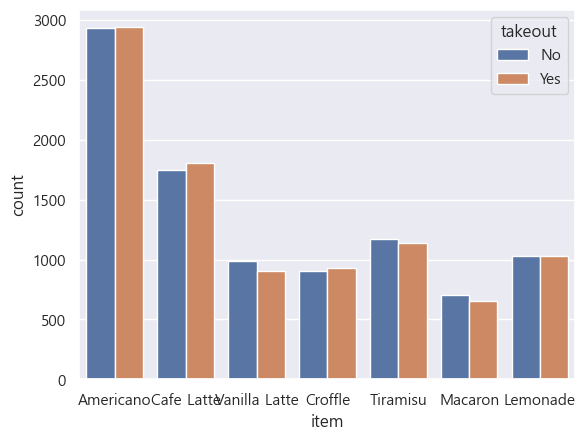

In [32]:
sns.countplot(data = cs_df,
            x = 'item',
            hue = 'takeout')

plt.show()

#### 2) seaborn의 displot을 사용하여 평점(rating)의 분포를 히스토그램으로 시각화하세요
-  각 그래프의 막대구간은 10개로 설정하고, 제목('평점 분포')을 추가하세요
- 메뉴 카테고리(category)별로 그래프가 좌우로 나뉘어서 그려지도록 설정하시오
- 확률밀도 함수가 같이 들어가도록 설정하시오
- plt.show()로 그래프를 출력하세요


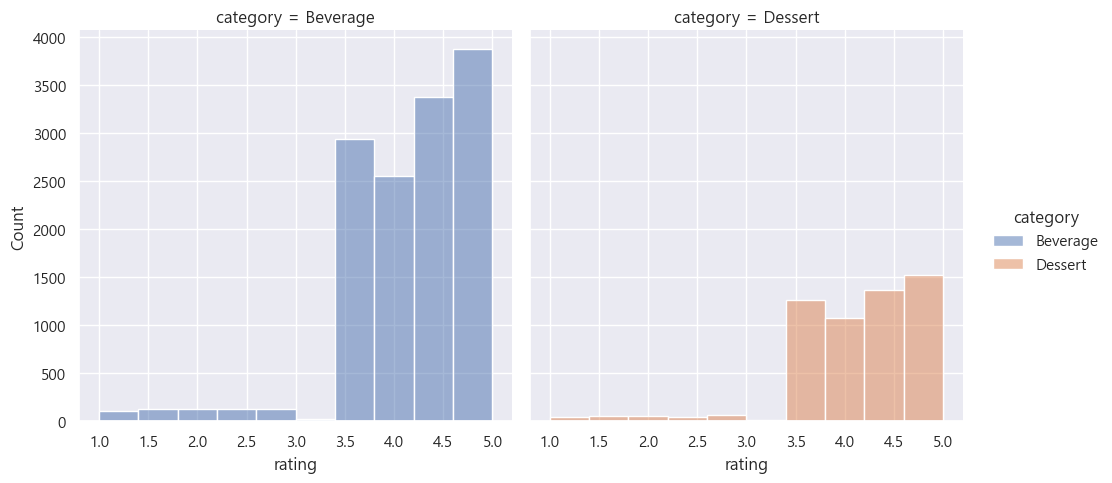

In [ ]:
sns.displot(data = cs_df,
            x = 'rating',
            bins = 10,
            hue = 'category',
            col = 'category',
            kind = 'hist')
plt.show()

## Part 3. 도전(20점)

### 1) 상품(item)별 총 매출액 계산
- 매출액(total_sales) 컬럼 활용
### 2) 매출액 기준 내림차순 정렬 후 상위 3개 상품만 추출
### 3) 상위 3개 상품의 매출액을 막대그래프로 시각화(그래프에 적절한 제목과 축 라벨 추가)
### 4) 분석 결과를 한 문장으로 해석하여 주석(#)으로 작성
### 5) payment method별로 그래프를 분리하여 상품에 따른 매출액(상위5개) 그래프 작성
- 2행 2열 그래프로 생성



In [ ]:
cs_df['total_sales'].groupby(cs_df['item']).sum()

item
Americano        39069000
Cafe Latte       25850000
Croffle          10788000
Lemonade         18264000
Macaron           5880000
Tiramisu         22353500
Vanilla Latte    15290000
Name: total_sales, dtype: int64

In [ ]:
cs_df['total_sales'].groupby(cs_df['item']).sum().sort_values(ascending=False).head(3)


item
Americano     39069000
Cafe Latte    25850000
Tiramisu      22353500
Name: total_sales, dtype: int64

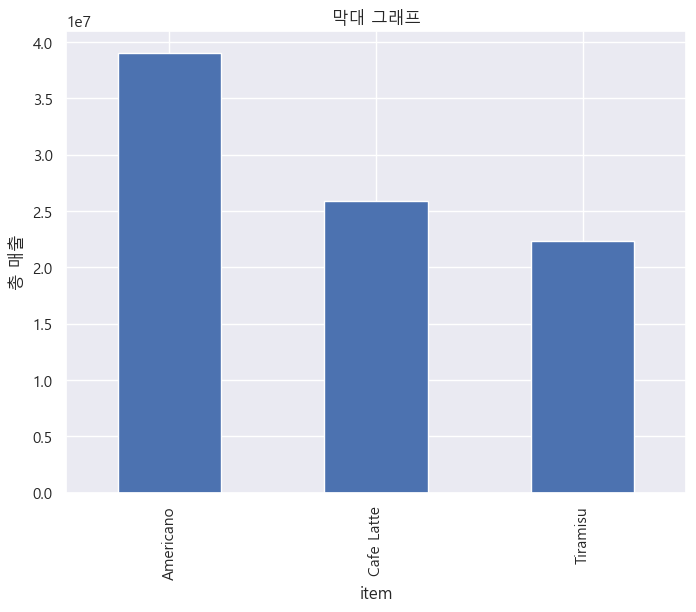

In [ ]:
# 막대 그래프 (pd_plot)
ax = cs_df['total_sales'].groupby(cs_df['item']).sum().sort_values(ascending=False).head(3)\
.plot(figsize=(8,6),
                               kind = 'bar')
ax.set(title = '막대 그래프',
       xlabel = 'item',
       ylabel = '총 매출')
plt.show()

아메리카노가 잘 팔린다.

In [ ]:
last_df = pd.DataFrame(cs_df['total_sales'].groupby(cs_df['item']).sum().sort_values(ascending=False).head(5))
last_df


,total_sales
item,
Americano,39069000
Cafe Latte,25850000
Tiramisu,22353500
Lemonade,18264000
Vanilla Latte,15290000


In [ ]:

x1 = last_df[last_df.item == "Americano"].total_sales
x2 = tips[tips.sex == "Female"].total_bill
y1 = tips[tips.sex == "Male"].tip
y2 = tips[tips.sex == "Female"].tip

In [ ]:
fig, ax = plt.subplot(2,2, figsize = (8,6), sharey = True)

ax[0].scatter(x1, y1,
              alpha = 0.5), label = 'B'


plt.show()

ValueError: Could not interpret value `payment_method` for `hue`. An entry with this name does not appear in `data`.